$f(x_i)=\omega  x_i + b$

In [ ]:
# 写入数据
import pandas as pd
data = pd.read_csv('Salary_Data.csv')

### 方法一：使用scipy库
#### 优点：回归分析比较简单
#### 缺点：目前只能做一元线性回归，不能用于预测

In [5]:
import scipy.stats as st

x = data.iloc[:, 0]
y = data.iloc[:, 1]

slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

print(slope)        # 输出斜率
print(intercept)    # 输出截距
print(r_value**2)   # 输出 r^2

9449.96232145508
25792.20019866868
0.9569566641435084


### 方法二：使用statsmodel包

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.14e-20
Time:                        19:14:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

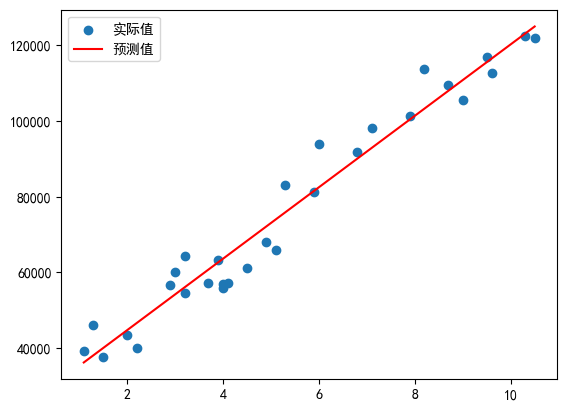

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x, hasconst=1)
results = model.fit()
print(results.summary())

plt.rcParams['font.sans-serif'] = ['SimHei']

predicts = results.predict()
x = data.iloc[:, 0]
plt.scatter(x, y, label='实际值')
plt.plot(x, predicts, color='red', label='预测值')
plt.legend()
plt.show()

##### 注意：若导入包时使用命令 import statsmodels.formula.api as sm, 则在回归分析时不用添加截距 add_constant，但是必须使用统计语言给出模型信息

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.14e-20
Time:                        19:26:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

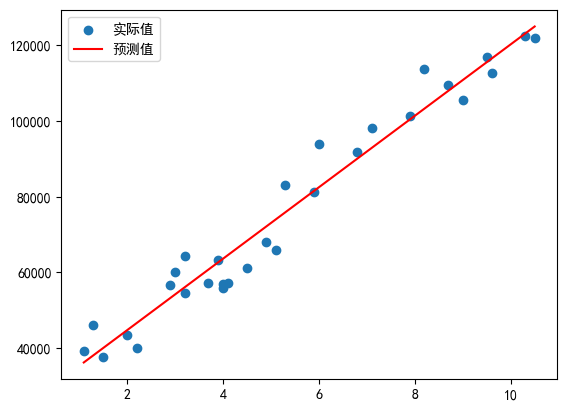

In [13]:
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

model_api = sm.ols('Salary~YearsExperience', data).fit() # 注意~
print(model_api.summary())

predicts = model_api.predict()
y = data.iloc[:, 1]
x = data.iloc[:, 0]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(x, y, label='实际值')
plt.plot(x, predicts, color='red', label='预测值')
plt.legend()
plt.show()

### 方法三：使用sklearn库
#### 默认自变量与因变量数据都是二维数据；一元回归时，自变量与因变量都需要处理下，总体上，sklearn 做线性回归有点麻烦。

R2 = 0.9570
[[9449.96232146]] [25792.20019867]


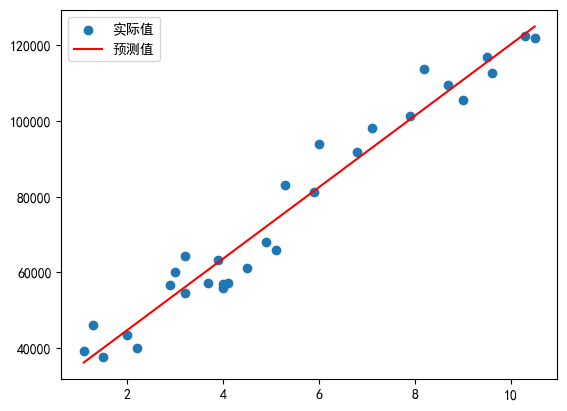

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Salary_Data.csv')
y = data.iloc[:, 1].values
x = data.iloc[:, 0].values

# 将x和y添加一个轴，来满足sklearn中回归模型认可的数据
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model_sklearn = LinearRegression()
model_sklearn.fit(x, y)
predicts = model_sklearn.predict(x)
R2 = model_sklearn.score(x, y)
print('R2 = %.4f' % R2)
coef = model_sklearn.coef_              # 斜率
intercept = model_sklearn.intercept_    # 截距
print(model_sklearn.coef_, model_sklearn.intercept_)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

y = data.iloc[:, 1]
x = data.iloc[:, 0]

plt.scatter(x, y, label='实际值')
plt.plot(x, predicts, color='red', label='预测值')
plt.legend()
plt.show()